__Importing Libraries & Deep Learning Libraries__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.optimizers import Adam, SGD, RMSprop

__Displaying Images__

In [2]:
# Define the expression label("happy")
expression = "happy"

# Define the folder path where the images are located
folder_path = r"C:\Users\ASUS\Downloads\Project_1\images\images"

# Define the size to resize the pictures
picture_size = (48, 48)

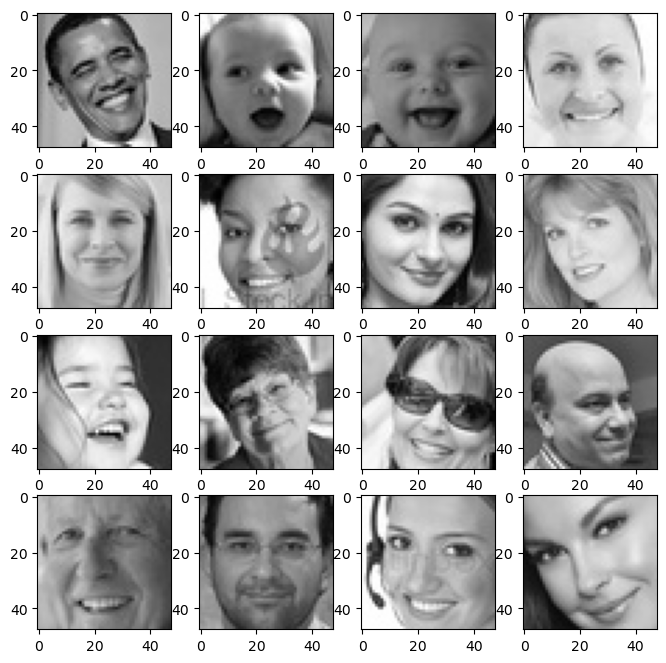

In [3]:
# Figure size for displaying the images
plt.figure(figsize=(8, 8))

# Get the list of files in the specified folder corresponding to the given expression label
files = os.listdir(os.path.join(folder_path, "train", expression))

# Loop through the first 16 files
for i in range(1, 17):
    # Create a subplot for each image, arranged in a 4*4 grid
    plt.subplot(4, 4, i)
    
     # Load and display the image using the specified target size
    img = load_img(os.path.join(folder_path, "train", expression, files[i]), target_size=picture_size)
    plt.imshow(img)
plt.show()

__Making Training and Validation Data__

In [4]:
# Set the batch size for training and validation data generators
batch_size = 128
picture_size = 48  # Define the size of input images

# Create data generators for training and validation data
datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()

# Define the paths to the training and validation data directories
train_path = r"C:\Users\ASUS\Downloads\Project_1\images\images\train"
test_path = r"C:\Users\ASUS\Downloads\Project_1\images\images\validation"

# Generate batches of training data from the specified directory
train_set = datagen_train.flow_from_directory(train_path,
                                              target_size=(picture_size, picture_size),
                                              color_mode="grayscale",
                                              batch_size=batch_size,
                                              class_mode="categorical",
                                              shuffle=True)

# Generate batches of validation data from the specified directory
test_set = datagen_val.flow_from_directory(test_path,
                                           target_size=(picture_size, picture_size),
                                           color_mode="grayscale",
                                           batch_size=batch_size,
                                           class_mode="categorical",
                                           shuffle=True)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


__Model Building__

In [5]:
# Number of classes in the classification task
no_of_classes = 7
from keras.models import Sequential
# Define the model architecture using Sequential API
model = Sequential()

# 1st CNN layer
model.add(Conv2D(64, (3, 3), padding="same", input_shape=(picture_size, picture_size, 1)))
model.add(BatchNormalization())  # Apply batch normalization to stabilize and accelerate training
model.add(Activation('relu'))  # ReLU activation function to introduce non-linearity
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling to down-sample feature maps
model.add(Dropout(0.25))  # Dropout regularization to prevent overfitting

# 2nd CNN layer
model.add(Conv2D(128, (5, 5), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd CNN layer
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the output to prepare for fully connected layers
model.add(Flatten())

# Fully connected 1st layer
model.add(Dense(256))  # Dense (fully connected) layer with 256 neurons
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected 2nd layer
model.add(Dense(512))  # Dense layer with 512 neurons
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Output layer with softmax activation for multi-class classification
model.add(Dense(no_of_classes, activation="softmax"))

# Specify optimizer with learning rate (Adam optimizer with custom learning rate)
opt = Adam(learning_rate=0.0001)

# Compile the model with optimizer, loss function, and evaluation metrics
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Display model architecture and parameters
model.summary()


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/49/a0/76cddcebb573097bcbf532ce05bd5dee6f26a228fb0cd874039e7a5abc4b/keras-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.1 MB 1.4 MB/s eta 0:00:01
   ---- ----------------------------------- 0.1/1.1 MB 1.4 MB/s eta 0:00:01
   --------- ------------------------------ 0.2/1.1 MB 1.9 MB/s eta 0:00:01
   ------------------ --------------------- 0.5/1.1 MB 2.8 MB/s eta 0:00:01
   --------------------------------- ------ 0.9/1.1 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 4.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.1.1
    Uninstalling keras-3.1.1:
      Successfully uninstalled keras-3.1.1
Note: you may need to restart the kernel to use updated packages.


__Fitting the Model with Training and Validation Data__

In [7]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from keras.callbacks import ModelCheckpoint

# Define callback for model checkpoint with .h5 extension
checkpoint = ModelCheckpoint('model.keras', 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')


early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                               min_delta=0,  # Minimum change in the monitored quantity to qualify as an improvement
                               patience=3,  # Number of epochs with no improvement after which training will be stopped
                               verbose=1,  # Verbosity mode (1: print messages)
                               restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored quantity

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',  # Monitor validation loss
                                        factor=0.2,  # Factor by which the learning rate will be reduced
                                        patience=3,  # Number of epochs with no improvement after which learning rate will be reduced
                                        verbose=1,  # Verbosity mode (1: print messages)
                                        min_delta=0.0001)  # Minimum change in the monitored quantity to qualify as an improvement

# Combine all callback functions into a list
callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

# Define the number of epochs for training
epochs = 48

In [8]:
# Train the model
history = model.fit(
    train_set,  # Training data generator yielding batches of training data
    epochs=epochs,  # Number of epochs (complete passes through the training dataset)
    validation_data=test_set,  # Validation data generator yielding batches of validation data
    callbacks=callbacks_list  # List of callback functions to monitor and control training
)

Epoch 1/48


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2011 - loss: 2.1604

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ASUS\\Downloads\\Project_1\\images\\images\\validation\\happy\\2182.jpg'
Traceback (most recent call last):

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\tensorflow\python\ops\script_ops.py", line 270, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\tensorflow\python\autograph\impl\api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py", line 250, in _get_iterator
    for i, batch in enumerate(gen_fn()):

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py", line 244, in generator_fn
    yield self.py_dataset[i]
          ~~~~~~~~~~~~~~~^^^

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(
          ^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\utils\image_utils.py", line 235, in load_img
    with open(path, "rb") as f:
         ^^^^^^^^^^^^^^^^

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ASUS\\Downloads\\Project_1\\images\\images\\validation\\happy\\2182.jpg'


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_one_step_on_iterator_9122]

In [ ]:
model.save_weights('model.h5')

__visualization__

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()